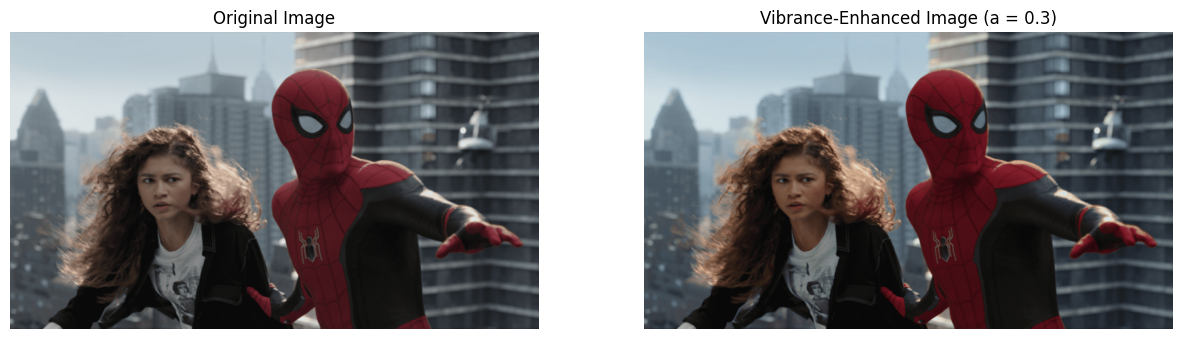

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('utils/spider.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Convert to HSV

# Split the HSV channels
hue, saturation, value = cv2.split(image_hsv)

# Define the transformation function
def enhance_vibrance(sat, a, sigma=70):
    x = sat.astype(np.float32)  # Convert to float for calculations
    transformed = x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2))
    return np.clip(transformed, 0, 255).astype(np.uint8)  # Clip values to be between 0 and 255

# Apply transformation with a = 0.3
a = 0.3
enhanced_saturation = enhance_vibrance(saturation, a)

# Recombine the HSV channels
enhanced_hsv = cv2.merge([hue, enhanced_saturation, value])
enhanced_image = cv2.cvtColor(enhanced_hsv, cv2.COLOR_HSV2RGB)  # Convert back to RGB

# Plot the original and enhanced images
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(enhanced_image)
axes[1].set_title(f'Vibrance-Enhanced Image (a = {a})')
axes[1].axis('off')

plt.show()

Intensity Transformation Plot

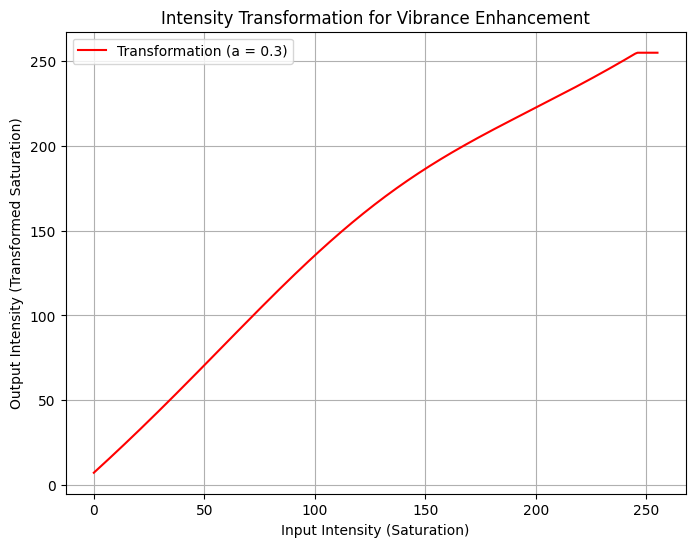

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create input intensity values (range of possible saturation values)
x_values = np.arange(0, 256, 1, dtype=np.float32)

# Apply the vibrance enhancement transformation for the intensity values
sigma = 70
a = 0.3  # Amplification factor
transformation_values = x_values + a * 128 * np.exp(-((x_values - 128) ** 2) / (2 * sigma ** 2))
transformation_values = np.clip(transformation_values, 0, 255)  # Clip values to the range [0, 255]

# Plot the original intensity vs the transformed intensity
plt.figure(figsize=(8, 6))
plt.plot(x_values, transformation_values, color='r', label=f'Transformation (a = {a})')
plt.xlabel('Input Intensity (Saturation)')
plt.ylabel('Output Intensity (Transformed Saturation)')
plt.title('Intensity Transformation for Vibrance Enhancement')
plt.grid(True)
plt.legend()
plt.show()

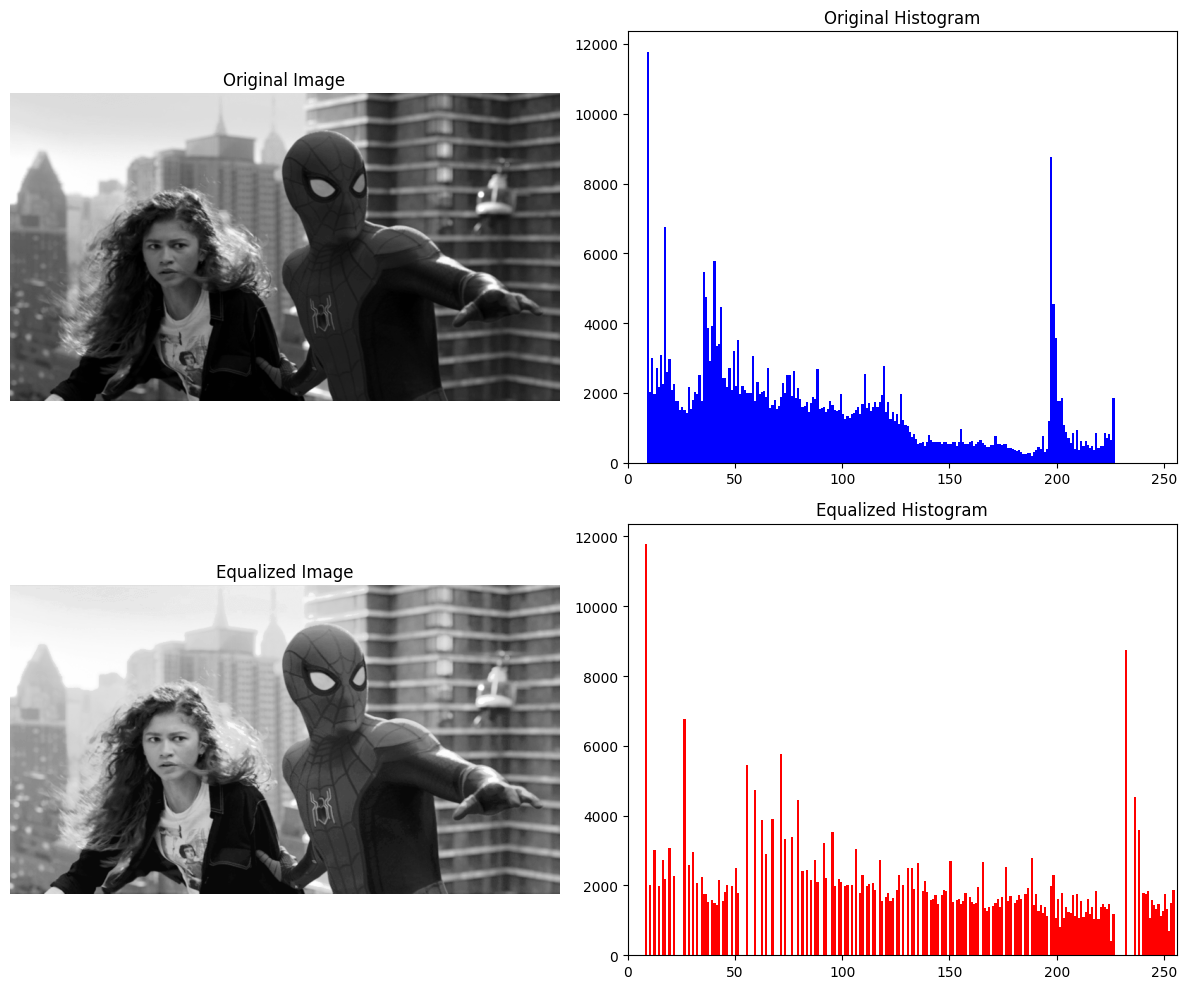

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to perform histogram equalization
def histogram_equalization(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Get image dimensions
    h, w = gray_image.shape
    
    # Calculate the histogram
    hist, bins = np.histogram(gray_image.flatten(), 256, [0, 256])

    # Calculate cumulative distribution function (CDF)
    cdf = hist.cumsum()
    
    # Normalize the CDF
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Apply histogram equalization
    cdf_m = np.ma.masked_equal(cdf, 0)  # Mask zeros to avoid division by zero
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Normalize the cdf
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')  # Fill masked values with 0

    # Use the CDF to map the old pixel values to the new values
    equalized_image = cdf[gray_image]

    return gray_image, equalized_image, hist, cdf_normalized

# Load the image (replace 'image_path' with the correct path to your image)
image = cv2.imread('utils/spider.png')

# Perform histogram equalization
gray_image, equalized_image, hist, cdf_normalized = histogram_equalization(image)

# Plot the original and equalized images
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Display the original image and histogram
ax[0, 0].imshow(gray_image, cmap='gray')
ax[0, 0].set_title("Original Image")
ax[0, 0].axis('off')

ax[0, 1].hist(gray_image.flatten(), 256, [0, 256], color='blue')
ax[0, 1].set_title("Original Histogram")
ax[0, 1].set_xlim([0, 256])

# Display the equalized image and histogram
ax[1, 0].imshow(equalized_image, cmap='gray')
ax[1, 0].set_title("Equalized Image")
ax[1, 0].axis('off')

ax[1, 1].hist(equalized_image.flatten(), 256, [0, 256], color='red')
ax[1, 1].set_title("Equalized Histogram")
ax[1, 1].set_xlim([0, 256])

plt.tight_layout()
plt.show()